# Singapore Airline Sentiment Analysis

The dataset consists of the following columns:
- published_date: The datetime of the review published
- published_platform: The platform used to published the review (Desktop / Mobile)
- rating: Customer rating from 1-5
- type
- text: Customer review comment
- title: Title of the review
- helpful_votes: Number of votes that find the corresponding review is helpful

In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px

In [2]:
df = pd.read_csv('./dataset/singapore_airlines_reviews.csv')

## Data Preparation

In [3]:
df.head()

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0


In [4]:
def check_df(dataframe, head=5):
    print("-----Shape-----")
    print(dataframe.shape)
    print("----- Types -----")
    print(dataframe.dtypes)
    print("----- Head -----")
    print(dataframe.head(head))
    print("----- Null -----")
    print(dataframe.isnull().sum())

check_df(df)

-----Shape-----
(10000, 7)
----- Types -----
published_date        object
published_platform    object
rating                 int64
type                  object
text                  object
title                 object
helpful_votes          int64
dtype: object
----- Head -----
              published_date published_platform  rating    type  \
0  2024-03-12T14:41:14-04:00            Desktop       3  review   
1  2024-03-11T19:39:13-04:00            Desktop       5  review   
2  2024-03-11T12:20:23-04:00            Desktop       1  review   
3  2024-03-11T07:12:27-04:00            Desktop       5  review   
4  2024-03-10T05:34:18-04:00            Desktop       2  review   

                                                text  \
0  We used this airline to go from Singapore to L...   
1  The service on Singapore Airlines Suites Class...   
2  Booked, paid and received email confirmation f...   
3  Best airline in the world, seats, food, servic...   
4  Premium Economy Seating on Singapor

In [5]:
df.describe()

,rating,helpful_votes
count,10000.000000,10000.000000
mean,4.015800,1.275200
std,1.346006,2.721618
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,1.000000
75%,5.000000,2.000000
max,5.000000,158.000000


In [6]:
def preprocess(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
  return text

In [7]:
df['processed_text'] = df['text'].apply(preprocess)
df['processed_title'] = df['title'].apply(preprocess)

In [8]:
df.head()

,published_date,published_platform,rating,type,text,title,helpful_votes,processed_text,processed_title
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,used airline singapore london heathrow issues ...,ok
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,service singapore airlines suites class excell...,service suites class makes feel like vip
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,booked paid received email confirmation extra ...,dont money
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,best airline world seats food service brillian...,best airline world
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,premium economy seating singapore airlines nar...,premium economy seating singapore airlines wor...


In [9]:
vectorizer_count = CountVectorizer()
vectorizer_tfidf = TfidfVectorizer()

bow_text = vectorizer_count.fit_transform(df['processed_text'])
tfidf_text = vectorizer_tfidf.fit_transform(df['processed_text'])

In [10]:
df['sentiment'] = df['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [11]:
df.head()

,published_date,published_platform,rating,type,text,title,helpful_votes,processed_text,processed_title,sentiment
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,used airline singapore london heathrow issues ...,ok,0.260407
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,service singapore airlines suites class excell...,service suites class makes feel like vip,0.178979
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,booked paid received email confirmation extra ...,dont money,-0.170000
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,best airline world seats food service brillian...,best airline world,0.693750
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,premium economy seating singapore airlines nar...,premium economy seating singapore airlines wor...,-0.257222


In [12]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce', utc=True)

if df['published_date'].dtype == 'datetime64[ns, UTC]':
  df['year'] = df['published_date'].dt.year
  df['month'] = df['published_date'].dt.month
  df['day'] = df['published_date'].dt.day
else:
  print("Datetime formatting failed")

In [13]:
dummies_platform = pd.get_dummies(df['published_platform'])
df = pd.concat([df, dummies_platform], axis=1)

In [14]:
df['review_length'] = df['processed_text'].apply(len)

In [15]:
df.head()

,published_date,published_platform,rating,type,text,title,helpful_votes,processed_text,processed_title,sentiment,year,month,day,Desktop,Mobile,review_length
0,2024-03-12 18:41:14+00:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,used airline singapore london heathrow issues ...,ok,0.260407,2024,3,12,1,0,717
1,2024-03-11 23:39:13+00:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,service singapore airlines suites class excell...,service suites class makes feel like vip,0.178979,2024,3,11,1,0,2688
2,2024-03-11 16:20:23+00:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,booked paid received email confirmation extra ...,dont money,-0.170000,2024,3,11,1,0,271
3,2024-03-11 11:12:27+00:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,best airline world seats food service brillian...,best airline world,0.693750,2024,3,11,1,0,102
4,2024-03-10 09:34:18+00:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,premium economy seating singapore airlines nar...,premium economy seating singapore airlines wor...,-0.257222,2024,3,10,1,0,411


In [16]:
# adjusting the n_components
lda = LatentDirichletAllocation(n_components=5)
lda_features = lda.fit_transform(tfidf_text)

In [17]:
df['sentiment_rating'] = df['sentiment'] * df['rating']

In [18]:
df.head()

,published_date,published_platform,rating,type,text,title,helpful_votes,processed_text,processed_title,sentiment,year,month,day,Desktop,Mobile,review_length,sentiment_rating
0,2024-03-12 18:41:14+00:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,used airline singapore london heathrow issues ...,ok,0.260407,2024,3,12,1,0,717,0.781220
1,2024-03-11 23:39:13+00:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,service singapore airlines suites class excell...,service suites class makes feel like vip,0.178979,2024,3,11,1,0,2688,0.894893
2,2024-03-11 16:20:23+00:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,booked paid received email confirmation extra ...,dont money,-0.170000,2024,3,11,1,0,271,-0.170000
3,2024-03-11 11:12:27+00:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,best airline world seats food service brillian...,best airline world,0.693750,2024,3,11,1,0,102,3.468750
4,2024-03-10 09:34:18+00:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,premium economy seating singapore airlines nar...,premium economy seating singapore airlines wor...,-0.257222,2024,3,10,1,0,411,-0.514444


## Rating Distribution Analysis

In [19]:
fig1 = px.histogram(df, x='rating', title='Customer Ratings Distribution')
fig1.update_xaxes(title_text='Rating')
fig1.update_yaxes(title_text='Count')
fig1.show()

## Sentiment Over Time

In [20]:
df['date'] = pd.to_datetime(df['published_date'],utc=True)
df.set_index('date',inplace=True)
sentiment_time = df['sentiment'].resample('M').mean().reset_index()

In [21]:
fig2 = px.line(sentiment_time, x='date', y='sentiment', title='Average Monthly Sentiment Over Time')
fig2.update_xaxes(title_text = 'Date')
fig2.update_yaxes(title_text = 'Average Sentiment')
fig2.show()

## Ratings Comparison Across Platforms

In [22]:
fig3 = px.box(df, x='published_platform', y='rating', title='Rating Comparison Across Platforms')
fig3.update_xaxes(title_text='Platform')
fig3.update_yaxes(title_text='Rating')
fig3.show()

In [23]:
fig3_2 = px.histogram(df,x='rating',color='published_platform',barmode='group',title='Customer Ratings Distribution by Platform')
fig3_2.update_xaxes(title_text='Rating')
fig3_2.update_yaxes(title_text='Count')
fig3_2.show()

## Word Cloud

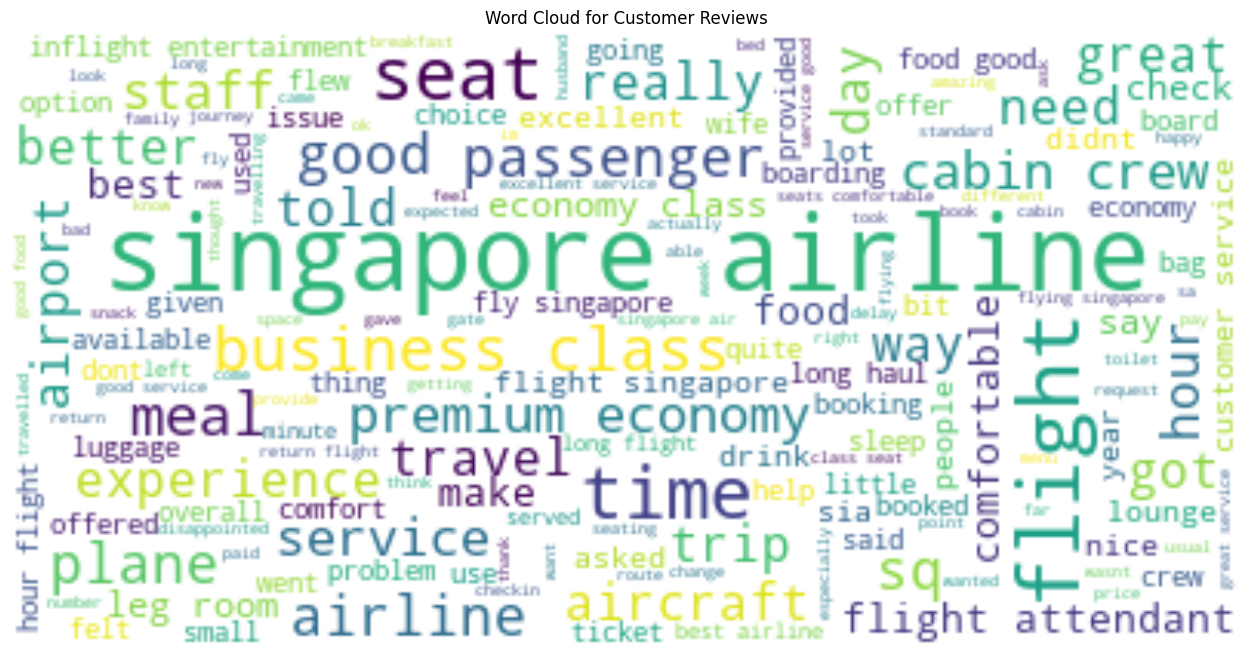

In [24]:
txt = ' '.join(review for review in df['processed_text'])
cloud = WordCloud(background_color='white').generate(txt)

plt.figure(figsize=(16,8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Customer Reviews')
plt.show()

## Correlation Analysis

In [25]:
corrmatrix = df[['rating','sentiment','helpful_votes']].corr()
fig4 = px.imshow(corrmatrix,text_auto=True,title='Correlation Matrix')
fig4.update_xaxes(side='top')
fig4.show()

In [26]:
df['main_topic'] = lda_features.argmax(axis=1)

In [27]:
fig5 = px.histogram(df,x='main_topic',title='Main Topic in Customer Reviews Distribution')
fig5.update_xaxes(title_text='Topic')
fig5.update_yaxes(title_text='Count')
fig5.show()

## Sentiment Score vs. Rating

In [28]:
fig6 = px.scatter(df,x='sentiment',y='rating',title='Sentiment Score vs. Customer Ratings')
fig6.update_xaxes(title_text='Sentiment Score')
fig6.update_yaxes(title_text='Rating')
fig6.show()

## Review Length Analysis

In [29]:
df['review_length'] = df['processed_text'].apply(len)
fig7 = px.histogram(df,x='review_length', title='Review Lengths Distribution')
fig7.update_xaxes(title_text='Review Length (number of characters)')
fig7.update_yaxes(title_text='Count')
fig7.show()

## Helpful Vote Analysis

In [30]:
fig8 = px.scatter(df,x='helpful_votes',y='sentiment',color='rating',title='Helpful Votes vs. Sentiment Score by Rating')
fig8.update_xaxes(title_text='Number of Helpful Votes')
fig8.update_yaxes(title_text='Sentiment Score')
fig8.show()

In [31]:
df.reset_index(inplace=True)

In [32]:
avg_rating_overtime = df.resample('M',on='date')['rating'].mean().reset_index()
fig9 = px.line(avg_rating_overtime, x='date',y='rating',title='Average Monthly Rating Over Time')
fig9.update_xaxes(title_text='Date')
fig9.update_yaxes(title_text='Average Rating')
fig9.show()